In [362]:
import pybedtools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr
import glob


# 1. Analysis of homotypic TFBSs
    e.g ESR1
    - From TFBS-BED get, GeneID, TSS_dist, homotypic_count for each ESR1 in the region 
    - Split data in 4 bins, so that ESR1 is (0-50, 50-100, 100-150, 150-200)bp away from the TSS
    - Generate Table per bin with number of TFBS in col_1 and Genexpresion in col_2. Every Tissue can be a seperate row.

In [2]:
data = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/New_TFBS_BED/Prom_with_TFBSs.bed")
gtex_df = pd.read_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/GTEx_GenExpr_ucsc.csv", sep=",")
gtex_df.columns

Index(['Name', 'Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)',
       'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary',
       'Artery - Tibial', 'Bladder', 'Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra', 'Breast - Mammary Tissue',
       'Cells - Cultured fibroblasts', 'Cells - EBV-transformed lymphocytes',
       'Cervix - Ectocervix', 'Cervix - Endocervix', 'Colon - Sigmoid',
       'Colon - Transverse', 'Esophagus - Gastroesophageal Junction',
       'Esophagus - Mucosa', 'Esophagus - Muscularis', 'Fallopian Tube',
       'Heart - Atrial Appendage', 'Heart - Left Ventricle', 

## Using single_tfbs_to_csv.py

The script generates for every TF a own csv file with all important information. 

python single_tfbs_to_csv.py -f /sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/New_TFBS_BED/Prom_with_TFBSs.bed -out /sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Protein_Region_single_tfbs -geneType "protein_coding"

This will lead to a folder with all important csv files.

In [261]:
csv_folder = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Protein_Region_single_TFBS_with_GTEx"
tf_name = "ESR1"
csv_file = f"{csv_folder}/{tf_name}.csv"

In [281]:
def get_df_for_single_tfbs(csv_file):
    # Specify column names
    columns_01 = ["chr","geneID","tf","close_tss","dist_tss","strand_orientation","homotypic_count","all_tfbs_count","all_tfbs_unique_count"]
    columns_02 = gtex_df.columns
    columns = columns_01 + list(columns_02)[1:]
    # Read single csv file
    tfbs_df = pd.read_csv(csv_file, names=columns)
    return tfbs_df

In [282]:
tfbs = get_df_for_single_tfbs(csv_file)
tfbs

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,Adipose - Subcutaneous,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,chr1,ENSG00000187634.11,ESR1,151,168,nT,2,69,49,0.476,...,0.531,0.794,4.910,17.48,3.423,6.864,5.414,11.290,6.696,0.046
1,chr1,ENSG00000187634.11,ESR1,151,168,T,2,69,49,0.476,...,0.531,0.794,4.910,17.48,3.423,6.864,5.414,11.290,6.696,0.046
2,chr1,ENSG00000188976.10,ESR1,167,184,nT,1,31,26,52.860,...,83.105,90.320,49.570,56.15,42.380,98.670,66.790,77.390,71.255,14.990
3,chr1,ENSG00000187223.3,ESR1,93,110,nT,1,5,4,0.000,...,73.890,144.300,0.000,0.00,0.000,0.095,0.000,0.000,0.000,0.000
4,chr1,ENSG00000187173.3,ESR1,95,112,nT,1,10,9,0.000,...,45.240,116.900,0.173,0.00,0.000,0.108,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19530,chr7,ENSG00000106025.8,ESR1,-6,11,T,2,14,11,13.770,...,1.477,1.849,23.620,17.64,11.790,3.018,36.640,11.220,5.615,0.033
19531,chr7,ENSG00000071243.15,ESR1,55,72,T,4,89,63,8.184,...,4.536,4.256,7.378,12.06,5.540,5.422,11.480,11.325,6.827,2.407
19532,chr7,ENSG00000071243.15,ESR1,132,149,nT,4,89,63,8.184,...,4.536,4.256,7.378,12.06,5.540,5.422,11.480,11.325,6.827,2.407
19533,chr7,ENSG00000071243.15,ESR1,161,178,T,4,89,63,8.184,...,4.536,4.256,7.378,12.06,5.540,5.422,11.480,11.325,6.827,2.407


In [5]:
geneexpr = tfbs.iloc[:,9:]
tfbs

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,Adipose - Subcutaneous,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,chr1,ENSG00000187634.11,ESR1,151,168,nT,2,69,49,0.476,...,0.531,0.794,4.910,17.48,3.423,6.864,5.414,11.290,6.696,0.046
1,chr1,ENSG00000187634.11,ESR1,151,168,T,2,69,49,0.476,...,0.531,0.794,4.910,17.48,3.423,6.864,5.414,11.290,6.696,0.046
2,chr1,ENSG00000188976.10,ESR1,167,184,nT,1,31,26,52.860,...,83.105,90.320,49.570,56.15,42.380,98.670,66.790,77.390,71.255,14.990
3,chr1,ENSG00000187223.3,ESR1,93,110,nT,1,5,4,0.000,...,73.890,144.300,0.000,0.00,0.000,0.095,0.000,0.000,0.000,0.000
4,chr1,ENSG00000187173.3,ESR1,95,112,nT,1,10,9,0.000,...,45.240,116.900,0.173,0.00,0.000,0.108,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19530,chr7,ENSG00000106025.8,ESR1,-6,11,T,2,14,11,13.770,...,1.477,1.849,23.620,17.64,11.790,3.018,36.640,11.220,5.615,0.033
19531,chr7,ENSG00000071243.15,ESR1,55,72,T,4,89,63,8.184,...,4.536,4.256,7.378,12.06,5.540,5.422,11.480,11.325,6.827,2.407
19532,chr7,ENSG00000071243.15,ESR1,132,149,nT,4,89,63,8.184,...,4.536,4.256,7.378,12.06,5.540,5.422,11.480,11.325,6.827,2.407
19533,chr7,ENSG00000071243.15,ESR1,161,178,T,4,89,63,8.184,...,4.536,4.256,7.378,12.06,5.540,5.422,11.480,11.325,6.827,2.407


In Order to calculate all tissues as independend Datapoint, it is necessary to generate for each geneexpr value a own row.

In [35]:
def flatten_tissues_expand_df(tfbs_df):
    tfbs_part_repeat = tfbs_df.iloc[:,:9]
    tfbs_part_flatten = tfbs_df.iloc[:,9:]
    
    repeat_df =  pd.DataFrame(np.repeat(tfbs_part_repeat, len(tfbs_part_flatten.columns), axis=0))
    flatten_arr = tfbs_part_flatten.to_numpy().flatten()
    
    repeat_df.columns = tfbs_part_repeat.columns
    repeat_df["All_tissues"] = flatten_arr

    return repeat_df

tfbs_exp_df = flatten_tissues_expand_df(tfbs)

Now The Spearman Correlation can be measured for each tfbs

In [74]:
def homotyic_pearson(tfbs_df):
    # First the Dataframe will be exoanded to include every tissue.
    expand_df = flatten_tissues_expand_df(tfbs_df)

    homotyic_count = expand_df.homotypic_count.to_numpy()
    geneexpr = expand_df.All_tissues.to_numpy()

    r,p_value = pearsonr(geneexpr, homotyic_count)

    return r,p_value
r,p_value = homotyic_pearson(tfbs)


In [75]:
r,p_value


(0.012632554618635272, 1.6931759743349098e-38)

### Plot Genexpr for homotypic count

In [257]:
def plot_homotypic_count_to_expr(tfbs_df, output):
    _# first the Dataframe will be exoanded to include every tissue.
    expand_df = flatten_tissues_expand_df(tfbs_df)

    homotyic_count = expand_df.homotypic_count.to_numpy()
    geneexpr = expand_df.All_tissues.to_numpy()

    # Split expr values according to homotypic count
    unique_count = np.unique(homotyic_count)
    geneexpr_2d_lst = []
    sample_sizes = []
    for i in unique_count:
        i_exp = geneexpr[homotyic_count == i]
        # log2 of i_exp:
        i_exp_non_zero = i_exp[i_exp!=0]
        i_exp_log = np.log2(i_exp_non_zero)

        geneexpr_2d_lst.append(list(i_exp_log))
        sample_sizes.append(len(i_exp_non_zero))
    
    fig, ax1 = plt.subplots()
    bp1 = ax1.boxplot(geneexpr_2d_lst, patch_artist=True,  labels=[f"{count}\n(n={size})" for count, size in zip(unique_count, sample_sizes)])
    ax1.set_xlabel("homotypic count")
    ax1.set_ylabel("log2(Expr)")
    ax1.set_xticklabels(unique_count)
    ax1.set_xlim(0, len(unique_count)+0.5)
    ax1.set_ylim(min([min(box) for box in geneexpr_2d_lst])- 4, max([max(box) for box in geneexpr_2d_lst])+ 4)
     # Add labels on top of each boxplot
    for i, box in enumerate(bp1['boxes']):
        # Get the x and y coordinates of the box
        xpos = i+1
        ypos = max(geneexpr_2d_lst[i])+1
        
        # Add label
        ax1.text(xpos, ypos, f"n={sample_sizes[i]}", ha='center', va='bottom', color='black', fontsize="x-small")

    plt.title("")
    fig.savefig(output)
    plt.show()

    return 

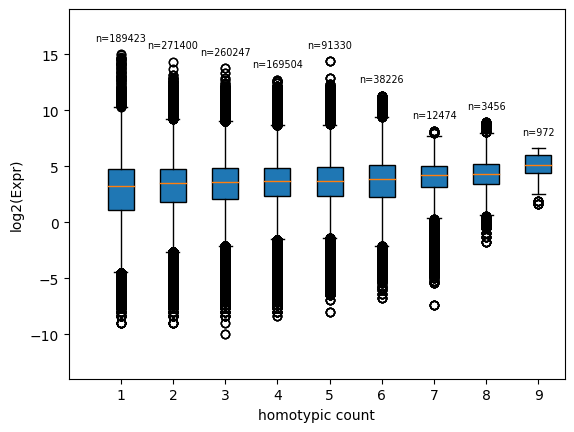

In [258]:
output = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Boxplot/ESR1_GeneExpr_by_count.png"
plot_homotypic_count_to_expr(tfbs, output)

# Calculate Geneexpression and pearson Coeffizient for all TFBSs

In [279]:
csv_folder = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Protein_Region_single_TFBS_with_GTEx"


Calculate pearson coff and plot it

In [288]:
def get_pearson_for_single_tf(csv_file):
    tfbs_df = get_df_for_single_tfbs(csv_file)
    tf_name = tfbs_df.tf.unique()[0]
    tfbs_df_flatten = flatten_tissues_expand_df(tfbs_df)
    r, p_value = homotyic_pearson(tfbs_df_flatten)
    return tf_name, r, p_value
    

In [302]:
def get_pearson_for_all_tf(csv_folder):
    tf_paths = glob.glob(f"{csv_folder}/*.csv")

    tf_dict = dict()
    #p_value_dict = dict()
    for tf_path in tf_paths:
        tf_name, r, p_value = get_pearson_for_single_tf(tf_path)
        tf_dict[tf_name] = r, p_value
        # p_value_dict[tf_name] = p_value
    return tf_dict
        
    

In [303]:
tf_dict = get_pearson_for_all_tf(csv_folder)
tf_dict

/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/pyt

{'HMBOX1': (-0.0017176130387992579, 0.7821508255128454),
 'PKNOX1': (-0.03175437947698332, 7.775282837818102e-30),
 'NR2C2': (-0.000830173388163183, 0.7683513630374749),
 'CLOCK': (-0.07087925240975543, 0.0027557641927752076),
 'TP63': (-0.009009776188936527, 0.002007046110578708),
 'MYC': (-0.008953479084474091, 2.2984386426472913e-29),
 'PHOX2B': (0.014822246076528212, 0.09498828087524706),
 'MGA': (-0.03717835419023862, 0.0003817435872283453),
 'SOX13': (-0.013908357518516858, 0.0010490496787167996),
 'STAT2': (-0.002848166299910756, 0.8114213054007292),
 'AR': (-0.00487173980787521, 0.00013117902453129826),
 'MYOG': (-0.03239623890019945, 0.03795915179735635),
 'NR1H3': (nan, nan),
 'JUND': (0.011349766635902547, 5.701985689993846e-10),
 'MYB': (-0.0015207150931916607, 0.4583332022354775),
 'MLX': (0.014053635710483939, 5.39087692946676e-07),
 'SOX4': (nan, nan),
 'ETV6': (-0.011589543647418054, 0.0010029647068918231),
 'MAX': (-0.003159522608127769, 0.0032943428515890996),
 'GFI1B

In [357]:
# Sort TF by log p_value and filter put NaN
df = pd.DataFrame({"TFs":tf_names, "r":r_values, "p_values": p_values_log})
df = df.sort_values(by="p_values", ascending=False)
df = df[df.r.notnull()]
df


,TFs,r,p_values
260,E2F1,0.027867,155.206413
218,RUNX2,0.067650,139.031986
126,MXI1,0.039752,136.272979
30,TEAD1,0.098896,87.599914
263,PPARG,0.028683,56.410495
...,...,...,...
220,CTCFL,-0.000337,0.060985
69,ATF4,-0.001128,0.056842
97,ZNF143,0.000326,0.053081
36,HOXB13,-0.000526,0.047498


In [363]:
import matplotlib as m

TypeError: pcolor() takes 1 or 3 positional arguments but 2 were given

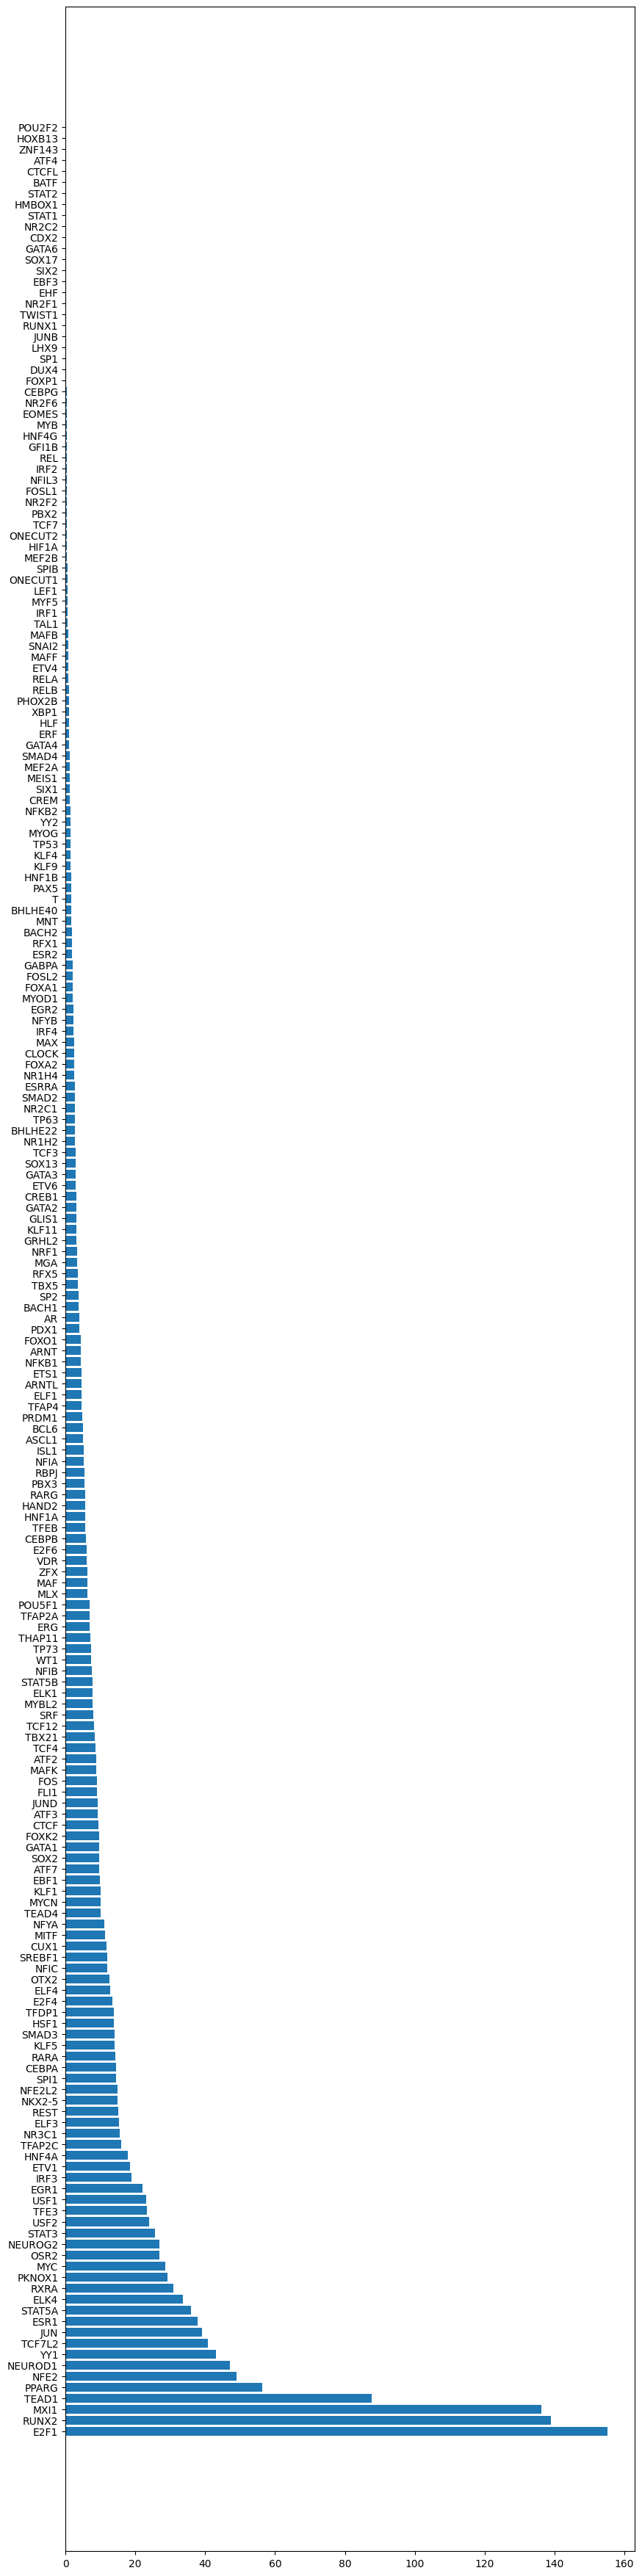

In [364]:
x = df.TFs.to_numpy()
p_value = df.p_values.to_numpy()
r_value = df.r.to_numpy()

fig, ax = plt.subplots(figsize=(10,45))

ax.barh(x, p_value, label="", align='center')
ax.pcolor(x, r)
ax.invert_yaxis()
#ax.set_yticks(np.arange(len(x)), x)
ax.set_xlabel("TFBSs")
ax.set_ylabel("Frequency")
ax.legend(loc="lower right")
ax.grid()
plt.title("Frequency of all TFBS in Promotor Regions")


In [327]:
df

,HMBOX1,PKNOX1,NR2C2,CLOCK,TP63,MYC,PHOX2B,MGA,SOX13,STAT2,...,REL,E2F1,ERF,NFKB1,PPARG,RXRB,KLF9,BATF,PLAG1,STAT5B
0,-0.001718,-3.175438e-02,-0.000830,-0.070879,-0.009010,-8.953479e-03,0.014822,-0.037178,-0.013908,-0.002848,...,-0.002598,2.786746e-02,-0.006662,0.010185,2.868333e-02,NaN,-0.003659,0.001322,NaN,-1.686152e-02
1,0.782151,7.775283e-30,0.768351,0.002756,0.002007,2.298439e-29,0.094988,0.000382,0.001049,0.811421,...,0.439421,6.217091e-156,0.073886,0.000045,3.886020e-57,NaN,0.030190,0.814730,NaN,1.850082e-08


[29.109283803887042,
 28.63856708535086,
 nan,
 nan,
 11.092643193504614,
 9.24397387695369,
 6.268340582744461,
 3.882135602906842,
 3.4182282497652823,
 2.998714349005312,
 2.9792039449030012,
 2.697442649764706,
 2.559757947199075,
 2.48223120455763,
 1.445735450512414,
 1.4206835005082665,
 1.022329972239155,
 0.5046788250029133,
 0.34539031001126486,
 0.33881868077538135,
 0.11444013396256547,
 0.10670949198878336,
 nan,
 nan,
 0.3409404305885879,
 0.09075359325913253,
 nan,
 nan,
 nan,
 87.59991441450465,
 48.95400073189153,
 15.36918884819337,
 nan,
 nan,
 nan,
 14.46065574459894,
 nan,
 14.03903157271494,
 nan,
 nan,
 14.167705294240447,
 nan,
 nan,
 nan,
 23.343883847909037,
 11.988363562433921,
 11.36195386347075,
 10.118113473813125,
 10.01029461171909,
 8.953058119537,
 7.8259475338439835,
 6.262312206595809,
 6.130313091720228,
 5.381740179390982,
 5.013329188605278,
 1.7343519404689411,
 1.3717545763113295,
 1.0994671776898046,
 0.6610169886549533,
 0.4879483552451417,
 0

## Extract Genexpression

In [143]:
def get_GeneExpr_for_geneIds(gtex_df, geneIds):
    gene_expr = np.empty((0,len(gtex_df.columns)-1))
    for id in geneIds:
        red_df = gtex_df[gtex_df.Name == id]
        if len(red_df) > 0 :
         expr = red_df.to_numpy()[0][1:]
        else:
            print(f"For {id} was no Expression Data found.")
            expr = np.zeros((1,len(gtex_df.columns)-1))

        gene_expr = np.vstack((gene_expr , expr))    
    return gene_expr


In [321]:
def get_GeneExpr_for_geneId(gtex_df, geneId):
        
    red_df = gtex_df[gtex_df.Name == geneId]
    if len(red_df) > 0 :
        expr = red_df.to_numpy()[0][1:]
    else:
        print(f"For {geneId} was no Expression Data found.")
        expr = np.empty((1,len(gtex_df.columns)-1))
        expr[:] = np.nan  
    return expr